# **11장 차원축소, 잠재공간, 오토인코더**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 11.4 다층 구조 오토인코더로 차원 축소/복원**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # 롤 데이터 생성하기
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

m = 1500
X, color = make_a_roll(m)

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(2, input_shape=[3],
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(2, activation='elu')])
dec = models.Sequential([layers.Dense(2, input_shape=[2],
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(3, activation='elu')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from tensorflow.keras.optimizers import Adam

AE = models.Sequential([enc, dec])
AE.compile(optimizer=Adam(learning_rate=1e-2),
           loss='mse')
history = AE.fit(X, X, epochs = 30)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2588
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1067
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0947
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0944
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0925
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0849
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0655
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0585
Epoch 9/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0491
Epoch 10/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0416
Epoch 11/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0370
Epoch 12/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0364
Epoch 13/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0366
Epoch 14/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0356
Epoch 15/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338
Epoch 16/30
47/47 ━

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


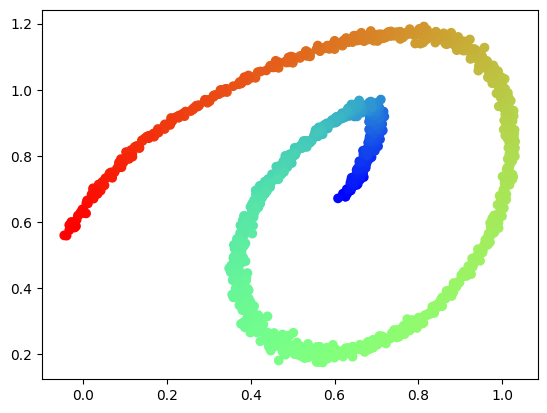

In [4]:
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


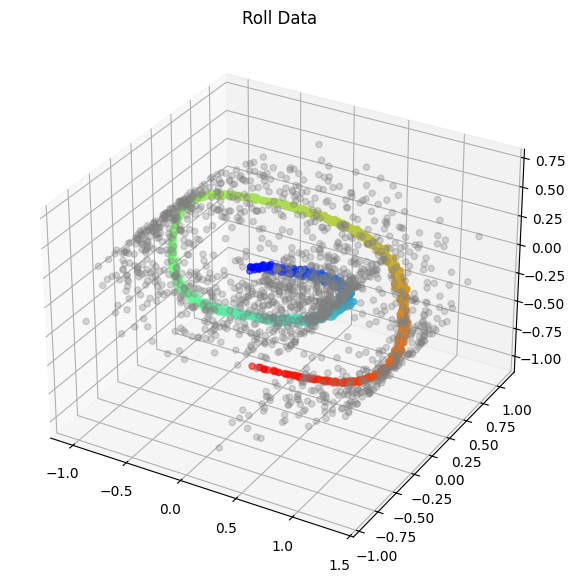

In [5]:
recoverd = dec.predict(reduced)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(recoverd[:,0], recoverd[:,1], recoverd[:,2], color = color)
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = 'gray', alpha=0.3)
plt.title("Roll Data")
plt.show()